## **Regression**

In [4]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd


# Simple Linear Regression (SLR) ----------
    # Title: Simple Linear Regression (SLR) to Predict Property Price Based on Size

    # Explanation:
    # In this section, we perform a simple linear regression where the independent variable is `Size (sq ft)`
    # and the dependent variable is `Property Price`. The goal is to fit a linear model and evaluate its performance.


In [8]:
data=pd.read_csv('data/re_dummy.csv')

In [10]:
data.head()

,Property Price,Size (sq ft),Bedrooms,Bathrooms,City,Year Built,Energy Efficiency Rating
0,250000,1500,3,2,New York,2001,A
1,320000,2000,4,3,Los Angeles,1995,B
2,180000,1200,2,1,Chicago,2010,A
3,450000,2500,5,4,Houston,1980,C
4,275000,1800,3,2,Miami,2005,B


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Property Price            50 non-null     int64 
 1   Size (sq ft)              50 non-null     int64 
 2   Bedrooms                  50 non-null     int64 
 3   Bathrooms                 50 non-null     int64 
 4   City                      50 non-null     object
 5   Year Built                50 non-null     int64 
 6   Energy Efficiency Rating  50 non-null     object
dtypes: int64(5), object(2)
memory usage: 2.9+ KB


In [13]:
data.describe()

,Property Price,Size (sq ft),Bedrooms,Bathrooms,Year Built
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,295000.000000,1800.000000,3.400000,2.400000,1998.200000
std,90688.972846,447.213595,1.030158,1.030158,10.447146
min,180000.000000,1200.000000,2.000000,1.000000,1980.000000
25%,250000.000000,1500.000000,3.000000,2.000000,1995.000000
50%,275000.000000,1800.000000,3.000000,2.000000,2001.000000
75%,320000.000000,2000.000000,4.000000,3.000000,2005.000000
max,450000.000000,2500.000000,5.000000,4.000000,2010.000000


In [14]:
data.describe(include='object')

,City,Energy Efficiency Rating
count,50,50
unique,5,3
top,New York,A
freq,10,20



# Preparing the data for SLR

In [15]:


# Preparing the data for SLR
X_slr = data[['Size (sq ft)']]
y = data['Property Price']

# Splitting the data into training and testing sets
X_train_slr, X_test_slr, y_train_slr, y_test_slr = train_test_split(X_slr, y, test_size=0.2, random_state=42)


In [16]:

# Initializing and fitting the SLR model
slr_model = LinearRegression()
slr_model.fit(X_train_slr, y_train_slr)

# Predicting on the test set
y_pred_slr = slr_model.predict(X_test_slr)



In [18]:
# Evaluating the model
mse_slr = mean_squared_error(y_test_slr, y_pred_slr)
r2_slr = r2_score(y_test_slr, y_pred_slr)

# Metrics for SLR
slr_metrics = {
    "Mean Squared Error (SLR)": mse_slr,
    "R-Squared (SLR)": r2_slr
}

slr_metrics



{'Mean Squared Error (SLR)': 225187160.41243458,
 'R-Squared (SLR)': 0.972373063377201}

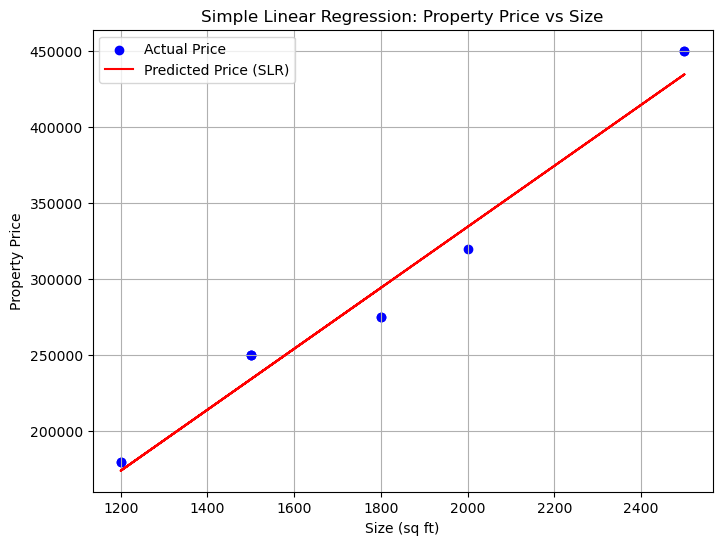

In [19]:

# Plotting the results
plt.figure(figsize=(8,6))
plt.scatter(X_test_slr, y_test_slr, color='blue', label='Actual Price')
plt.plot(X_test_slr, y_pred_slr, color='red', label='Predicted Price (SLR)')
plt.title('Simple Linear Regression: Property Price vs Size')
plt.xlabel('Size (sq ft)')
plt.ylabel('Property Price')
plt.legend()
plt.grid(True)
plt.show()



# Multiple Linear Regression (MLR) ----------
    # Title: Multiple Linear Regression (MLR) to Predict Property Price Based on Multiple Features

    # Explanation:
    # In this section, we perform a multiple linear regression where the independent variables include
    # `Size (sq ft)`, `Bedrooms`, `Bathrooms`, and `Year Built`.
    # The goal is to use multiple features to predict the property price and evaluate the model's performance.


In [21]:

# Preparing the data for MLR
X_mlr = data[['Size (sq ft)', 'Bedrooms', 'Bathrooms', 'Year Built']]
y_mlr = data['Property Price']

# Splitting the data into training and testing sets
X_train_mlr, X_test_mlr, y_train_mlr, y_test_mlr = train_test_split(X_mlr, y_mlr, test_size=0.2, random_state=42)


In [22]:

# Initializing and fitting the MLR model
mlr_model = LinearRegression()
mlr_model.fit(X_train_mlr, y_train_mlr)

# Predicting on the test set
y_pred_mlr = mlr_model.predict(X_test_mlr)

# Evaluating the model
mse_mlr = mean_squared_error(y_test_mlr, y_pred_mlr)
r2_mlr = r2_score(y_test_mlr, y_pred_mlr)

# Metrics for MLR
mlr_metrics = {
    "Mean Squared Error (MLR)": mse_mlr,
    "R-Squared (MLR)": r2_mlr
}

mlr_metrics


{'Mean Squared Error (MLR)': 12429779.497086063,
 'R-Squared (MLR)': 0.9984750607904446}


# Polynomial Linear Regression (PLR) ----------
    # Title: Polynomial Linear Regression (PLR) to Predict Property Price Based on Size with Non-linearity

    # Explanation:
    # In this section, we perform polynomial regression, which extends linear regression by adding polynomial terms.
    # We will focus on `Size (sq ft)` but include polynomial terms to capture any non-linear relationship
    # between property size and price.


In [23]:

from sklearn.preprocessing import PolynomialFeatures

# Preparing the data for PLR
poly_features = PolynomialFeatures(degree=3)  # Degree 3 polynomial for better flexibility
X_poly = poly_features.fit_transform(X_slr)  # Transforming the size feature to include polynomial terms

# Splitting the data into training and testing sets
X_train_plr, X_test_plr, y_train_plr, y_test_plr = train_test_split(X_poly, y, test_size=0.2, random_state=42)



In [24]:
# Initializing and fitting the PLR model
plr_model = LinearRegression()
plr_model.fit(X_train_plr, y_train_plr)

# Predicting on the test set
y_pred_plr = plr_model.predict(X_test_plr)




In [25]:
# Evaluating the model
mse_plr = mean_squared_error(y_test_plr, y_pred_plr)
r2_plr = r2_score(y_test_plr, y_pred_plr)

# Metrics for PLR
plr_metrics = {
    "Mean Squared Error (PLR)": mse_plr,
    "R-Squared (PLR)": r2_plr
}

plr_metrics






{'Mean Squared Error (PLR)': 36355563.8781923,
 'R-Squared (PLR)': 0.9955397418871068}

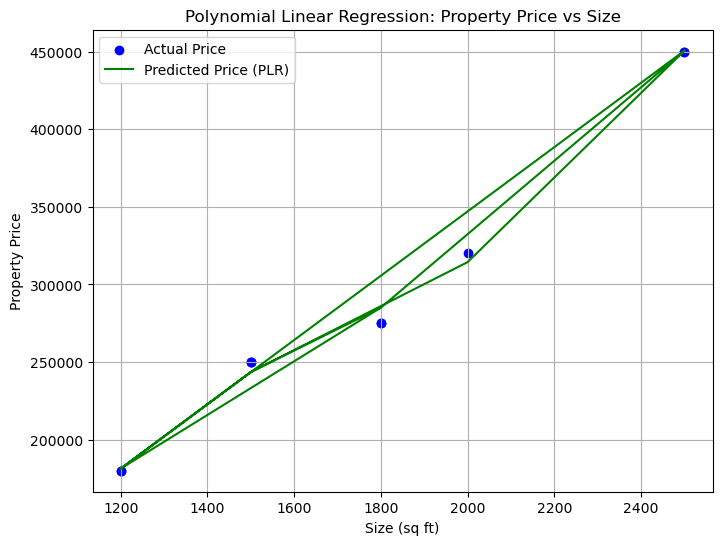

In [26]:
# Plotting the results
plt.figure(figsize=(8,6))
plt.scatter(X_test_slr, y_test_plr, color='blue', label='Actual Price')
plt.plot(X_test_slr, y_pred_plr, color='green', label='Predicted Price (PLR)')
plt.title('Polynomial Linear Regression: Property Price vs Size')
plt.xlabel('Size (sq ft)')
plt.ylabel('Property Price')
plt.legend()
plt.grid(True)
plt.show()


# Conclusion:
    # Based on the results from SLR, MLR, and PLR:
    # - SLR provided a good fit but might miss some complexities captured by additional features.
    # - MLR provided the best performance with multiple variables.
    # - PLR added non-linearity but had a higher mean squared error, indicating possible overfitting.
